In [1]:
import pandas as pd
from sklearn import tree
import numpy as np
from sklearn.metrics import mean_squared_error 
from sklearn.tree import DecisionTreeRegressor


In [17]:
new_train = pd.read_csv('new_train.csv')
new_test = pd.read_csv('new_test.csv')

In [3]:
from sklearn.model_selection import train_test_split

X = new_train.drop(columns=['Sales']) 
y = new_train['Sales']               


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#plot the relationship between max_depth and r2 value
#also compare predicted test data with predicted train data to see how overfitting happens

import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# Initialize lists to store R-squared values
max_depth_values = []
r2_values = []
r2_train_values = []

# Vary max_depth from 1 to 30
for max_depth in range(1, 30, 2):
    # Create Decision Tree Regressor
    model = DecisionTreeRegressor(max_depth=max_depth)
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    
    # Calculate R-squared
    r2 = r2_score(y_test, y_pred)
    r2_train = r2_score(y_train, y_pred_train)
    
    # Append values to lists
    max_depth_values.append(max_depth)
    r2_values.append(r2)
    r2_train_values.append(r2_train)

# Plot the relationship between max_depth and R-squared
plt.figure(figsize=(8, 6))
plt.plot(max_depth_values, r2_values, marker='o', linestyle='-', color='b', label="test_data")
plt.plot(max_depth_values, r2_train_values, marker='x', linestyle='-', color='r', label="train_data")
plt.legend(loc='lower right')
plt.xlabel('max_depth')
plt.ylabel('R-squared')
plt.title('Relationship between max_depth and R-squared')
plt.grid(True)
plt.show()

In [ ]:
min_samples_split_values = []
r2_values = []
r2_train_values = []

# Vary min_samples_split from 2 to 30
for min_sample in range(2, 30, 2):
    # Create Decision Tree Regressor
    model = DecisionTreeRegressor(min_samples_split=min_sample)
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    
    # Calculate R-squared
    r2 = r2_score(y_test, y_pred)
    r2_train = r2_score(y_train, y_pred_train)
    
    # Append values to lists
    min_samples_split_values.append(min_sample)
    r2_values.append(r2)
    r2_train_values.append(r2_train)

# Plot the relationship between max_depth and R-squared
plt.figure(figsize=(8, 6))
plt.plot(min_samples_split_values, r2_values, marker='o', linestyle='-', color='b', label="test_data")
plt.plot(min_samples_split_values, r2_train_values, marker='x', linestyle='-', color='r', label="train_data")
plt.legend(loc='lower right')
plt.xlabel('min_samples_split')
plt.ylabel('R-squared')
plt.title('Relationship between min_samples_split and R-squared')
plt.grid(True)
plt.show()

In [ ]:
min_samples_leaf_values = []
r2_values = []
r2_train_values = []

# Vary min_samples_leaf from 1 to 10
for min_sample in range(1, 10):
    # Create Decision Tree Regressor
    model = DecisionTreeRegressor(min_samples_leaf=min_sample)
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    
    # Calculate R-squared
    r2 = r2_score(y_test, y_pred)
    r2_train = r2_score(y_train, y_pred_train)
    
    # Append values to lists
    min_samples_leaf_values.append(min_sample)
    r2_values.append(r2)
    r2_train_values.append(r2_train)

# Plot the relationship between max_depth and R-squared
plt.figure(figsize=(8, 6))
plt.plot(min_samples_leaf_values, r2_values, marker='o', linestyle='-', color='b', label="test_data")
plt.plot(min_samples_leaf_values, r2_train_values, marker='x', linestyle='-', color='r', label="train_data")
plt.legend(loc='lower right')
plt.xlabel('min_samples_leaf')
plt.ylabel('R-squared')
plt.title('Relationship between min_samples_leaf and R-squared')
plt.grid(True)
plt.show()

In [ ]:
#use random search to find the best hyperparameters
#concidering the best parameters above

from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'max_depth': np.arange(15,25),
    'min_samples_split': np.arange(15,25),
    'min_samples_leaf': np.arange(3,5)
    
}
dtree_reg = DecisionTreeRegressor()
random_search = RandomizedSearchCV(estimator=dtree_reg, param_distributions=param_grid, 
                           cv=5, n_jobs=-1, verbose=False, scoring='neg_mean_squared_error')
random_search.fit(X_train, y_train)
best_dtree_reg = random_search.best_estimator_ # Get the best estimator from the randomized search
y_pred = best_dtree_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
best_params = random_search.best_params_
print(param_grid)
print(f"Best parameters: {best_params}")
print(f"Test RMSE: {rmse}")

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
# Predict on the training data using the best estimator
y_train_pred = best_dtree_reg.predict(X_train)

# Predict on the test data using the best estimator
y_test_pred = best_dtree_reg.predict(X_test)

# Evaluate the model on the training data
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = mse_train ** 0.5
r2_train = r2_score(y_train, y_train_pred)

# Evaluate the model on the test data
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = mse_test ** 0.5
r2_test = r2_score(y_test, y_test_pred)

# Print the parameter grid, best parameters, and evaluation metrics
print(param_grid)
print(f"Best parameters: {best_params}")
print(f"Train MSE: {mse_train}")
print(f"Train RMSE: {rmse_train}")
print(f"Train R^2: {r2_train}")
print(f"Test MSE: {mse_test}")
print(f"Test RMSE: {rmse_test}")
print(f"Test R^2: {r2_test}")

# Check for overfitting by comparing train and test performance
if rmse_train < rmse_test:
    print("The model may be overfitting the training data.")
elif rmse_train == rmse_test:
    print("The model performance is consistent across training and test data.")
else:
    print("The model may be underfitting the training data.")

In [13]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Split the dataset (assuming X and y are already defined)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the DecisionTreeRegressor with the best parameters
dtree_reg = DecisionTreeRegressor(
    max_depth=24,
    min_samples_split=15,
    min_samples_leaf=4,
    random_state=42
)

# Fit the model on the training data
dtree_reg.fit(X_train, y_train)

# Predict on the training and test data
y_train_pred = dtree_reg.predict(X_train)
y_test_pred = dtree_reg.predict(X_test)

# Evaluate the model on training data
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_train_pred)

# Evaluate the model on test data
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_test_pred)

# Print the evaluation results
print("Training Performance:")
print(f"R^2: {r2_train}")
print(f"MSE: {mse_train}")
print(f"RMSE: {rmse_train}")

print("\nTest Performance:")
print(f"R^2: {r2_test}")
print(f"MSE: {mse_test}")
print(f"RMSE: {rmse_test}")

# Check for overfitting by comparing train and test performance
if rmse_train < rmse_test:
    print("The model may be overfitting the training data.")
elif rmse_train == rmse_test:
    print("The model performance is consistent across training and test data.")
else:
    print("The model may be underfitting the training data.")


Training Performance:
R^2: 0.9801488747744684
MSE: 191540.0249107634
RMSE: 437.6528589084771

Test Performance:
R^2: 0.9578714696086281
MSE: 403816.7717543862
RMSE: 635.4657911755645
The model may be overfitting the training data.


In [14]:
# post pruning

from sklearn.metrics import mean_squared_error, r2_score

# Initialize the DecisionTreeRegressor with the best parameters found
dtree_reg = DecisionTreeRegressor(
    max_depth=24,
    min_samples_split=15,
    min_samples_leaf=4,
    random_state=42
)

# Fit the model to get the pruning path
dtree_reg.fit(X_train, y_train)
path = dtree_reg.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas
impurities = path.impurities

# Reduce the number of ccp_alpha values to evaluate
ccp_alphas = np.linspace(0, 0.05, 20)

# Initialize lists to store the metrics for each alpha
train_scores = []
test_scores = []

# Loop over the values of alpha
for ccp_alpha in ccp_alphas:
    dtree_reg_pruned = DecisionTreeRegressor(
        max_depth=24,
        min_samples_split=17,
        min_samples_leaf=3,
        random_state=42,
        ccp_alpha=ccp_alpha
    )
    dtree_reg_pruned.fit(X_train, y_train)
    
    # Record the training and test scores for the current alpha
    train_scores.append(dtree_reg_pruned.score(X_train, y_train))
    test_scores.append(dtree_reg_pruned.score(X_test, y_test))

# Select the optimal alpha (based on the plot) and re-fit the model
optimal_alpha = ccp_alphas[np.argmax(test_scores)]

# Fit the best pruned tree with the best hyperparameters and optimal alpha
best_pruned_tree = DecisionTreeRegressor(
    max_depth=24,
    min_samples_split=17,
    min_samples_leaf=3,
    random_state=42,
    ccp_alpha=optimal_alpha
)
best_pruned_tree.fit(X_train, y_train)

# Predict on training and test data
y_train_pred_pruned = best_pruned_tree.predict(X_train)
y_test_pred_pruned = best_pruned_tree.predict(X_test)

# Evaluate the pruned model on training data
mse_train_pruned = mean_squared_error(y_train, y_train_pred_pruned)
rmse_train_pruned = mse_train_pruned ** 0.5
r2_train_pruned = r2_score(y_train, y_train_pred_pruned)

# Evaluate the pruned model on test data
mse_test_pruned = mean_squared_error(y_test, y_test_pred_pruned)
rmse_test_pruned = mse_test_pruned ** 0.5
r2_test_pruned = r2_score(y_test, y_test_pred_pruned)

# Print the evaluation results for the pruned model
print(f"Optimal alpha: {optimal_alpha}")
print(f"Pruned Train MSE: {mse_train_pruned}")
print(f"Pruned Train RMSE: {rmse_train_pruned}")
print(f"Pruned Train R^2: {r2_train_pruned}")
print(f"Pruned Test MSE: {mse_test_pruned}")
print(f"Pruned Test RMSE: {rmse_test_pruned}")
print(f"Pruned Test R^2: {r2_test_pruned}")

# Check for overfitting by comparing train and test performance
if rmse_train_pruned < rmse_test_pruned:
    print("The model may still be overfitting the training data.")
elif rmse_train_pruned == rmse_test_pruned:
    print("The model performance is consistent across training and test data.")
else:
    print("The model may be underfitting the training data.")

Optimal alpha: 0.042105263157894736
Pruned Train MSE: 191611.98234008127
Pruned Train RMSE: 437.7350595281137
Pruned Train R^2: 0.9801414171376588
Pruned Test MSE: 400628.7849449461
Pruned Test RMSE: 632.9524349782897
Pruned Test R^2: 0.958204059061526
The model may still be overfitting the training data.


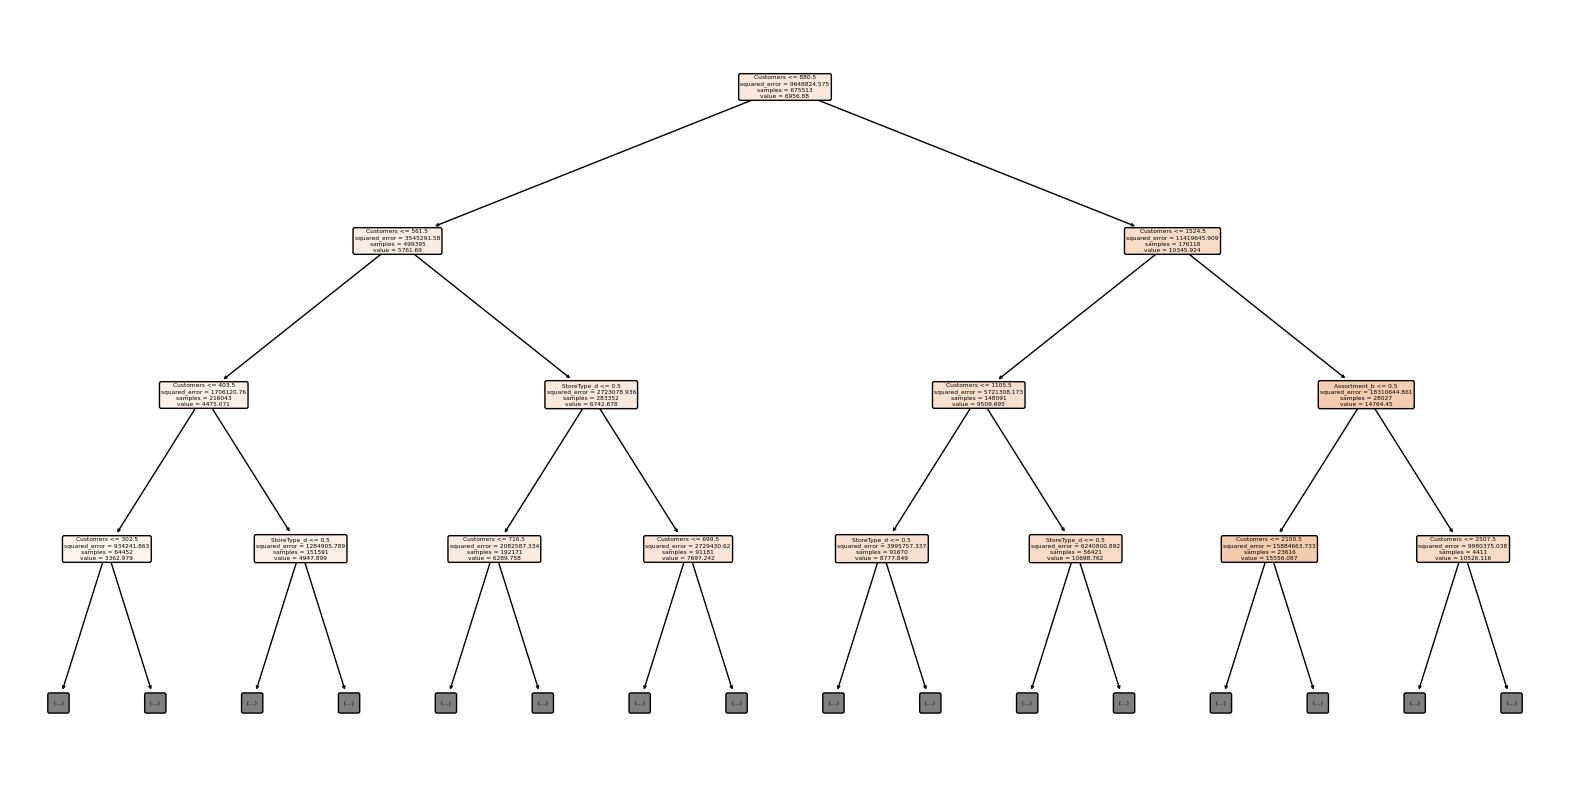

In [15]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor, export_graphviz, plot_tree
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import graphviz

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Visualize the pruned tree with a limited depth
plt.figure(figsize=(20, 10))
plot_tree(best_pruned_tree, 
          max_depth=3,  # Limit to first 3 levels of the tree
          feature_names=X_train.columns, 
          filled=True, 
          rounded=True)
plt.show()



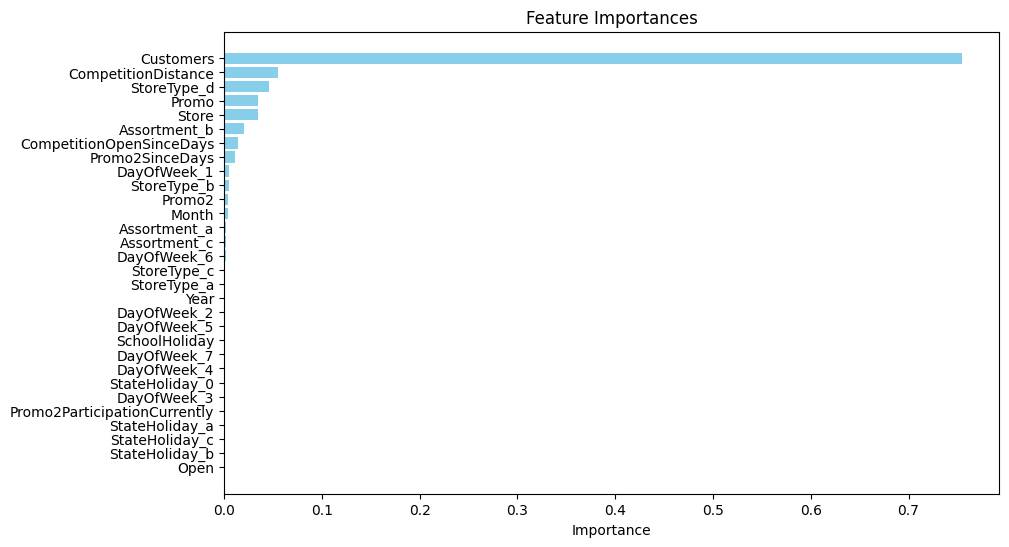

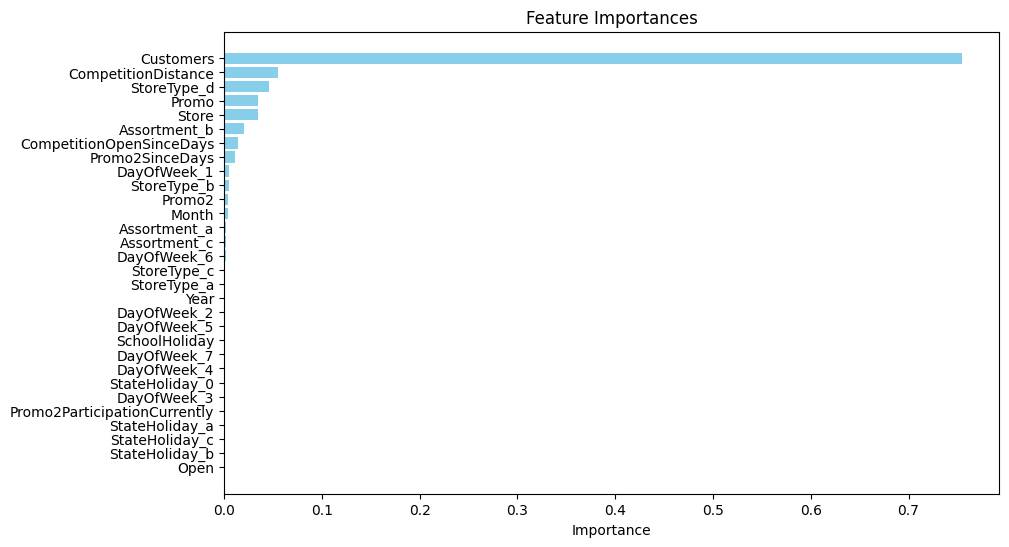

In [11]:
import pandas as pd

# Get feature importances
feature_importances = best_pruned_tree.feature_importances_

# Create a DataFrame for better visualization
feat_importances = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Sort by importance
feat_importances = feat_importances.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feat_importances['Feature'], feat_importances['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.gca().invert_yaxis()
plt.show()




In [ ]:
# overfitting, so we try cv 
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error
import numpy as np

# Define the model
model = DecisionTreeRegressor(max_depth=23, min_samples_leaf=3, min_samples_split=23)

# Define a custom scorer (if needed, otherwise you can use default scoring)
scoring = {
    'r2': 'r2',
    'mse': make_scorer(mean_squared_error, greater_is_better=False)  # MSE should be minimized
}

# Perform cross-validation
from sklearn.model_selection import cross_validate

# Perform cross-validation with 5 folds (you can choose k as needed)
cv_results = cross_validate(model, X, y, cv=5, scoring=scoring, return_train_score=False)

# Print results
print("Cross-Validation Results:")
print(f"Mean R^2: {np.mean(cv_results['test_r2'])}")
print(f"Mean MSE: {np.mean(cv_results['test_mse'])}")

# For RMSE
mean_rmse = np.sqrt(-np.mean(cv_results['test_mse']))  # RMSE is the square root of MSE
print(f"Mean RMSE: {mean_rmse}")


In [ ]:
# lowering max depth and increasinf min node
#no big improvement
model = DecisionTreeRegressor(max_depth=15, min_samples_leaf=3, min_samples_split=35)

# Define a custom scorer (if needed, otherwise you can use default scoring)
scoring = {
    'r2': 'r2',
    'mse': make_scorer(mean_squared_error, greater_is_better=False)  # MSE should be minimized
}

# Perform cross-validation
from sklearn.model_selection import cross_validate

# Perform cross-validation with 5 folds (you can choose k as needed)
cv_results = cross_validate(model, X, y, cv=5, scoring=scoring, return_train_score=False)

# Print results
print("Cross-Validation Results:")
print(f"Mean R^2: {np.mean(cv_results['test_r2'])}")
print(f"Mean MSE: {np.mean(cv_results['test_mse'])}")

# For RMSE
mean_rmse = np.sqrt(-np.mean(cv_results['test_mse']))  # RMSE is the square root of MSE
print(f"Mean RMSE: {mean_rmse}")


In [ ]:
# randomized search 
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer, mean_squared_error
import numpy as np

# Define the model
model = DecisionTreeRegressor()

# Define the hyperparameter space
param_dist = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 5, 10],
    'max_features': ['auto', 'sqrt', 'log2', None],
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson']
}

# Define custom scorer (optional)
scoring = make_scorer(mean_squared_error, greater_is_better=False)  # We want to minimize MSE

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    n_iter=30,  # Number of parameter settings that are sampled
    cv=5,        # Number of folds in cross-validation
    scoring=scoring,
    n_jobs=-1,   # Use all available cores
    verbose=1,   # Print progress messages
    random_state=42  # For reproducibility
)

# Fit the random search to the data
random_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = random_search.best_params_
best_score = random_search.best_score_

print("Best Hyperparameters:")
print(best_params)
print(f"Best Cross-Validation Score (Negative MSE): {best_score}")

# Optionally, evaluate the best model on the test set
best_model = random_search.best_estimator_
y_test_pred = best_model.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)

print(f"Test MSE: {test_mse}")
print(f"Test RMSE: {test_rmse}")
